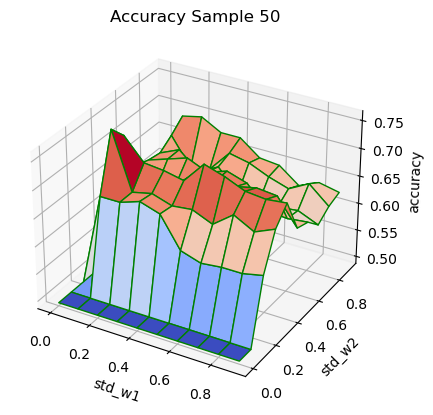

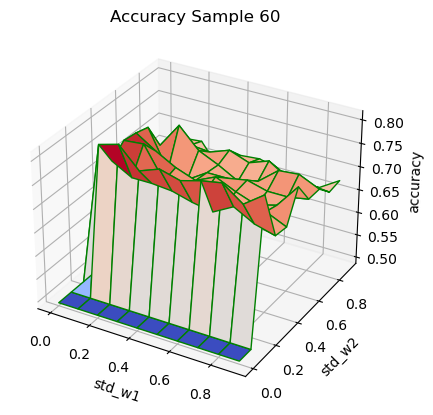

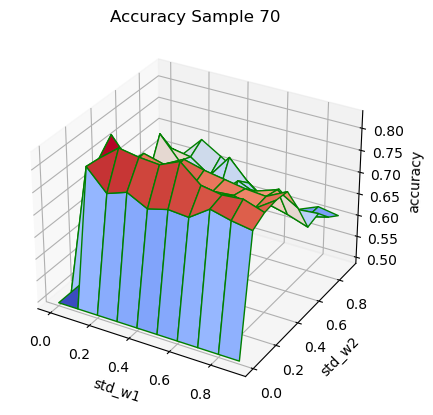

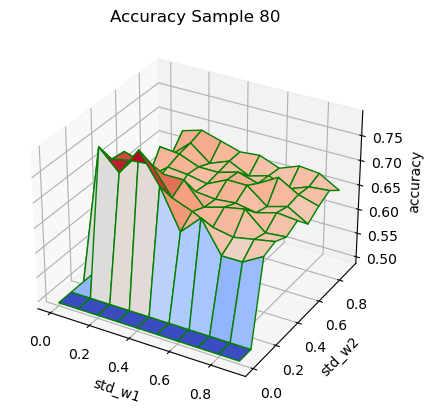

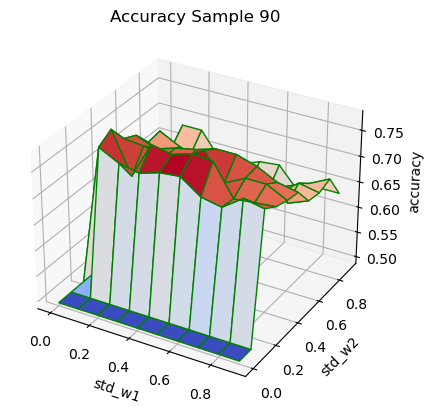

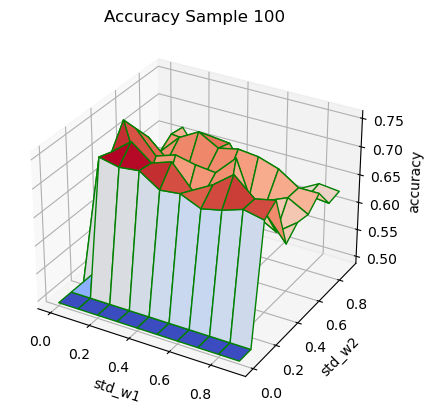

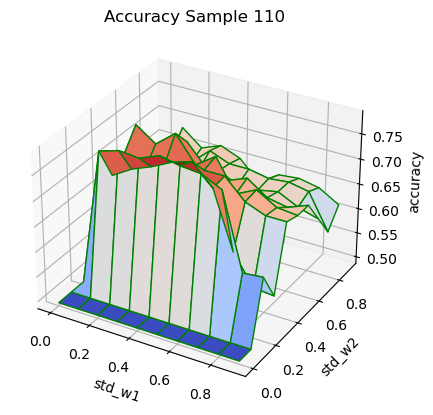

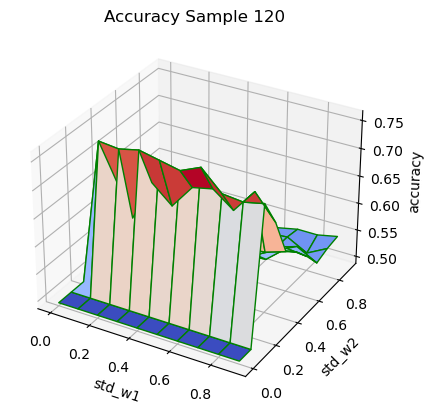

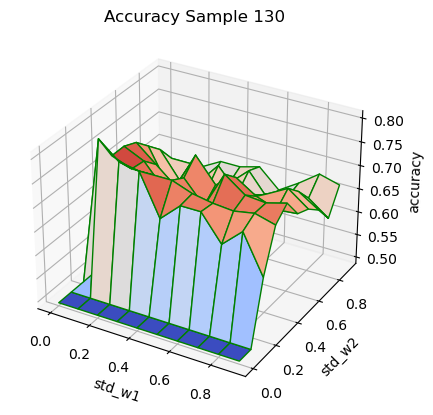

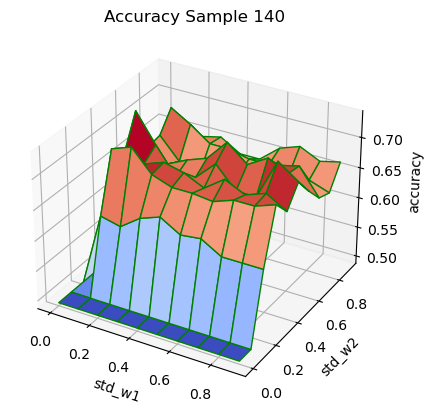

In [14]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input50sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i,sample) in zip(range(len(sample_list)),sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['accuracy_w1_w2']*100, cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('accuracy')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in zip(range(len(axis_std_w1)),axis_std_w1):
        for (k,std_w2) in zip(range(len(axis_std_w2)), axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]*100


In [15]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.52226562, 0.51757812, 0.51914063, 0.51679688,
        0.51796875, 0.51757812, 0.52070313, 0.51953125, 0.51875   ],
       [0.4921875 , 0.74648437, 0.74101562, 0.74414062, 0.73046875,
        0.71914062, 0.71640625, 0.69765625, 0.6875    , 0.68359375],
       [0.4921875 , 0.74101562, 0.71328125, 0.72265625, 0.71601563,
        0.71289062, 0.70625   , 0.69453125, 0.6859375 , 0.68671875],
       [0.4921875 , 0.72265625, 0.70351562, 0.6890625 , 0.69375   ,
        0.6953125 , 0.6921875 , 0.68945312, 0.68710938, 0.68242187],
       [0.4921875 , 0.70195312, 0.6796875 , 0.68085938, 0.68476563,
        0.68828125, 0.67890625, 0.6734375 , 0.67773438, 0.67539063],
       [0.4921875 , 0.6703125 , 0.65507812, 0.6671875 , 0.65625   ,
        0.659375  , 0.66015625, 0.65625   , 0.65664062, 0.64960938],
       [0.4921875 , 0.66640625, 0.6617187

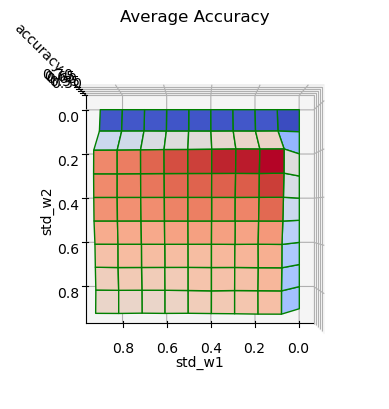

In [16]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('accuracy')
ax.set_title('Average Accuracy')
ax.view_init(90,90)
fig.savefig("average_accuracy_grid_over_10_samples.png".format(sample))

In [17]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [18]:
best_w1_w2

(2, 1)

In [19]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [20]:
average_accuracy_grid_10_by_10_10_samples[2]

array([0.4921875 , 0.74648437, 0.74101562, 0.74414062, 0.73046875,
       0.71914062, 0.71640625, 0.69765625, 0.6875    , 0.68359375])

In [21]:
average_accuracy_grid_10_by_10_10_samples[:,1]

array([0.4921875 , 0.52226562, 0.74648437, 0.74101562, 0.72265625,
       0.70195312, 0.6703125 , 0.66640625, 0.65429688, 0.65273437])

In [22]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_accuracy_grid_10_by_10_10_samples[2])
std_dev_w2 = np.std(average_accuracy_grid_10_by_10_10_samples[:,1])

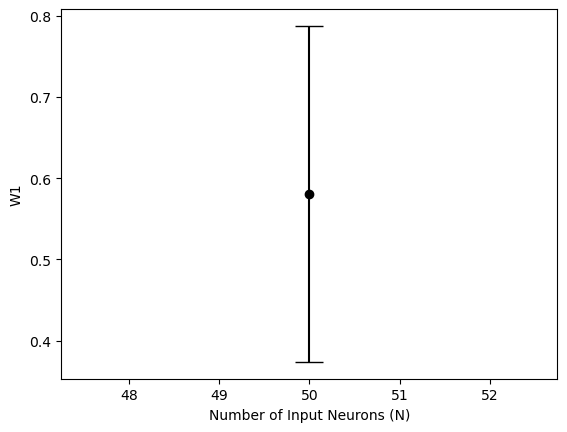

In [23]:
fig, ax = plt.subplots()
ax.scatter(50, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(50, array_best_w1_best_w2[0]/0.3445, std_dev_w1/0.3445, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("W1")
fig.savefig("input50forW1.png")

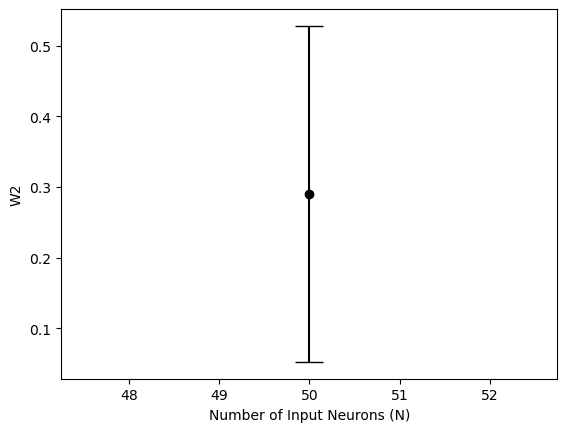

In [24]:
fig2, ax2 = plt.subplots()
ax2.scatter(50, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(50, array_best_w1_best_w2[1]/0.3445, std_dev_w2/0.3445, capsize=10.0, color= "k")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("W2")
fig2.savefig("input50forW2.png")

In [25]:
data = {}
data['N'] = 50
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = 0.3
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = 0.1
np.savez("50_input_neurons_w1_w2.npz",**data)